# Домашее задание "деревья решений"

### На основе датасета titanic обучить дерево решений

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [5]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [6]:
train = pd.get_dummies(train, columns=['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [7]:
train.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [8]:
train.dropna(inplace = True)

In [9]:
X_train = train.drop('Survived', axis=1)
Y_train = train.Survived

In [10]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
gs = pd.read_csv('titanic/gender_submission.csv')
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
test = test.merge(gs, on='PassengerId', how='left')

In [13]:
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test = pd.get_dummies(test, columns=['Embarked'])
test.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)
test.dropna(inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,0,1,0
1,893,3,0,47.0,1,0,7.0000,1,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,0,1
4,896,3,0,22.0,1,1,12.2875,1,0,0,1


In [14]:
X_test = test.drop('Survived', axis=1)
Y_test = test.Survived

In [15]:
ydt = dt.predict(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
ylr = lr.fit(X_train, Y_train).predict(X_test)

In [20]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(3, weights = 'uniform' )
yknn = knn.fit(X_train, Y_train).predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
metrics.roc_auc_score(Y_test, ydt)

0.7704763007565232

In [23]:
metrics.roc_auc_score(Y_test, ylr)

0.914138490041686

In [37]:
metrics.roc_auc_score(Y_test, yknn)

0.5288713910761156

In [38]:
fpr1, tpr1, threshold = metrics.roc_curve(Y_test, ydt)
fpr2, tpr2, threshold = metrics.roc_curve(Y_test, ylr)
fpr3, tpr3, threshold = metrics.roc_curve(Y_test, yknn)

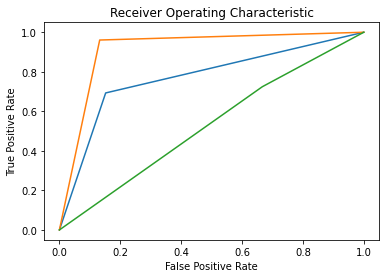

In [45]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'Decision tree')
plt.plot(fpr2, tpr2, label = 'Logistic regression')
plt.plot(fpr3, tpr3, label = 'K nearest neightbours')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()